# Reporte Final, simulación de proyectiles volcánicos
### Do Hyun Nam, A01025276

Clase: F1004B Modelación Computacional del Movimiento



# Introducción
En el mundo existen más de 1500 volcanes activos, que ciertamente son unas formaciones extraordinarias de la naturaleza, pero también representan un gran peligro para las poblaciones circundantes. Capaces de expulsar magma, cenizas y rocas en velocidades y temperaturas muy altas, el riesgo que presentan son inigualables. 

Siendo el enfoque de esta investigación los distintos proyectiles que se arrojan dentro de una explosión volcánica, averiguaremos cuáles son de los más comunes que vamos a observar. 

Primero que nada tenemos las cenizas, que son polvos minerales originados cuando ocurre una combustión de algún material. Estos llegan a tener una masa y diámetro mínimo, por lo que pueden viajar cientos de kilómetros del epicentro. Dentro de los daños que estos pudieran causar esta la reducción de la visibilidad (efectos similares a la neblina), dificultades respiratorias, tapado de coladeras y descomposición de aeronaves ya que estas no se disuelven fácilmente con el agua.

Luego tenemos a los lapilli, que son fragmentos de roca con un diámetro de 2 mm a 64 mm, con una masa menor a los 100 gramos generalmente. Al ser más pesados y grandes que las cenizas, estas no causan reducción en la visibilidad o dificultades respiratorias, por su tamaño y masa mayor. Los fragmentos más grandes pueden llegar a causar daños materiales y heridas en caso de golpear a un objeto o persona, pero dado a su masa la energía con la impactarán no será lo suficientemente peligrosa. 

Los que ya se pudieran clasificar como proyectiles balísticos tienen un diámetro mayor a los 64 mm y una masa igual mayor a los 100 gramos. Su composición varía, por lo que dependiendo de la materia que predomina se pueden subclasificar. Comúnmente están formado por magma enfríada, es decir, en el trayecto se vuelve una roca solida. De acuerdo a la CENAPRED, un balístico de 300 mm puede viajar a 500 km/hr, e impactar con la energía de un auto de una tonelada viajando a 100 km/hr. Estos son los que poseén un factor de riesgo mayor, por lo quer identificar su trayectoria es fundamental para reducir los daños en una explosión. 

# Hipótesis
Considerando variables iniciales comunes para el proyectil, la diferencia entre el modelo de trayectoria en el vacío y con resistencia del aire serán representaciones gráficas con formas similares, pero siendo el del vacío con un alcance y altura máxima mayores que el de resistencia del aire.

# Modelación computacional

## Parte 1: Trayectoria de un proyectil

En el entregable anterior, obtuvimos la descripción del movimiento del proyectil sin considerar la resistencia del aire. El procedimiento nos llevó a la siguiente expresión,

$\vec{r}(t) = \big(v_{ox}t\big) \vec{i} + \big(-\frac{1}{2}gt^2+v_{oy}t+s_{oy}\big)\vec{j}$

Donde $v_o$ es un vector de velocidad inicial con componentes $v_{ox}$ y $v_{oy}$. 

Podemos obtener estas componentes utilizando un ángulo $\theta$ respecto al eje horizontal,

$v_{ox} = v_o\cos{\theta}$

$v_{oy} = v_o\sin{\theta}$

### Importar librerias requeridas

In [21]:
# Importar libreriar necesarias para las gráficas
import numpy as np
import matplotlib.pyplot as plt

### Definición de las variables iniciales
Los datos para cada tipo de proyectil se obtuvieron mediante las investigaciones realizadas por la CENAPRED y el Centro Geológico Mexicano. El rango de valores se presenta en la siguiente tabla.
<img src="images/Picture1.png">

### Variables empleadas para el ejemplo
Las variables abajo se emplearon para el desarrollo del modelo computacional, no se relacionan con un ningún fenómeno físico factible en la realidad.

In [22]:
# Velocidad Inicial promedio medida de los proyectiles del Popocatépetl (CENAPRED)
v_0 = 130
# Ángulo en grados
theta_deg = 70
# Altura inicial, altura similar a la del Popocatépetl
y_0 = 5000
# Vector de tiempo
t = np.linspace(0, 50, num=200)
# Masa
m = .250
# Densidad del Aire a 500 grados centigrados
rho = 0.47
# Coeficiente de arrastre, sabiendo que será mayor a la de una esfera regular
C = 0.65
# Radio del lapili
r = .1/2
# Área de contacto del lapilli
A = np.pi*r**2
# Delta t
dt = 0.2
# Iteraciones
N = 10000

### Calcular la trayectoria sin resistencia del aire
Ya que tenemos nuestros datos principales, podemos crear los arreglos `r_x` y `r_y` que representan las componentes de los vectores de posición. Recuerda que utilizando numpy puedes hacer esto en un solo paso para cada componente.

Haremos esto definiendo una función llamada `proyectile_no_drag()` que tome como argumentos:
* La velocidad inicial en metros sobre segundo
* El ángulo en grados respecto al eje horizontal.
* La altura incial en metros
* Un arreglo con cada valor de tiempo a simular en segundos
* Opcionalmente se puede definir la gravedad pero si no se incluye nada enconces se tomará $9.81 \frac{m}{s^2}$

In [23]:
from math import pi, cos, sin
def proyectile_no_drag(v_0, theta_degree, y_0, t, g = -9.81):
    
    # Ángulo en radianes
    theta_rad = theta_degree*pi/180
    
    # Componentes de velocidad inicial
    v_0x = v_0*cos(theta_rad)
    v_0y = v_0*sin(theta_rad)
    
    # Posiciones de x y y en cada paso t
    r_x = v_0x*t
    r_y = v_0y*t+0.5*g*(t**2)+y_0
    
    return r_x, r_y

### Ejecuta y grafica los resultados
Declaración de los puntos a correr

In [24]:
r_x, r_y = proyectile_no_drag(v_0, theta_deg, y_0,t)

### Visualización de la gráfica de posición x contra y

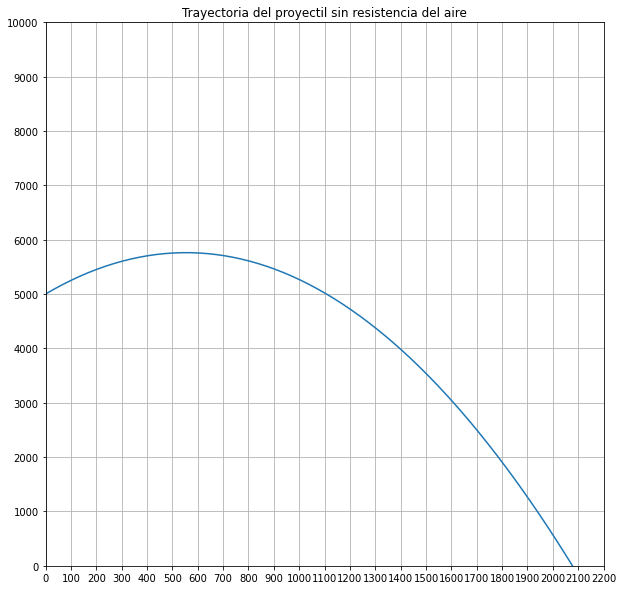

In [25]:
# Hacer una figura con dimensiones de (15 x 4) pixeles.
fig = plt.figure(figsize=(10,10))

# Hacer el gráfico
plt.plot(r_x,r_y)

# Poner una cuadrícula
plt.grid()

# Hacer que los ejes tengan la misma proporción
# plt.axis('scaled')

# Poner el título
plt.title("Trayectoria del proyectil sin resistencia del aire")

# Definir el rango del eje x
plt.xlim([0,2200])
# Definir el rango del eje y
plt.ylim([0,10000])

# Definir la ubicación de los ticks (marcadores) del eje x
_ = plt.xticks(np.arange(0,2201,100))
# Definir la ubicación de los ticks (marcadores) del eje y
_ = plt.yticks(np.arange(0,10001,1000))

## Parte 2: Trayectoria considerando resistencia del aire


##### El problema a resolver
La realidad es que aunque ignoramos la resistencia del aire anteriormente, ésta puede tener un impacto muy fuerte en la trayectoria del proyectil. El problema principal al que nos enfrentamos es que ahora la aceleración no es constante, eso significa que necesitamos una manera de encontrar una manera de describir la aceleración para ambas componentes. Es decir, donde antes supusimos que $a_x = 0$ y $a_y = -g$ en este caso tendremos valores no constantes.

Lo primero que necesitamos hacer es definir un diagrama de cuerpo libre del sistema.

En la figura podemos observar dos fuerzas afectando este sistema, la primera es el peso del proyectil el cual en la figura aparece como $mg$. Donde $m$ es la masa del proyectil y $g$ es la gravedad.

Por otro lado tenemos el vector de resistencia del aire $\vec{F_D}$. Este vector a su vez se descompone en $F_{Dx}$ y $F_{Dy}$.

Como se puede apreciar en la figura, $\vec{F_D}$ está relacionado con el vector de velocidad $\vec{v}$ esa relación es concretamente la siguiente,

$F_{D} = -Dv\vec{v}$

Es decir que la fuerza de resistencia del aire es igual a una constante $D$ que depende del problema específico (describiremos $D$ muy pronto) y el producto escalar entre la magnitud de la velocidad, $v$ y el vector de velocidad $\vec{v}$.

$F_D$ a su vez se descompone de la siguiente manera,

* $F_{Dx} = -Dvv_x$
* $F_{Dy} = -Dvv_y$

$D$ se describe de la siguiente manera,

$D = \frac{CA\rho}{2}$

Dónde,

* $C$ es el coeficiente de arrastre, este depende del material del proyectil y su forma.
* $A$ es el área frontal del proyectil.
* $\rho$ es la densidad del aire.

Cabe señalar que aunque la velocidad aparece en este diagrama de cuerpo libre, no es una fuerza que se ejerce sobre el proyectil por lo que no se incluye dentro de los cálculos que vamos a realizar.

##### Segunda Ley de Newton

Utilizando la **Segunda Ley de Newton** obtenemos las siguientes ecuaciones,

* $\sum F_x = -Dvv_x = ma_x$
* $\sum F_y = -mg - Dvv_y = ma_y$

Y si despejamos la aceleración en ambas obtenemos,

* $a_x = -\frac{D}{m}vv_x$
* $a_x = -g - \frac{D}{m}vv_y$

Lo que significa que en cualquier punto podemos obener la aceleración siempre y cuando tengamos la velocidad.

##### Aproximando el resultado

El único problema con nuestras expresiones de la aceleración es que no son funciones del tiempo, por lo que para resolver el problema necesitamos aproximar cada paso en el tiempo, uno por uno.

Es decir, empezaremos definiendo una posición ($\vec{s}$) y velocidad ($\vec{v}$) iniciales, de ahí calcularemos la aceleración ($\vec{a}$) utilizando nuestras ecuaciones de la sección anterior. Podemos entonces ir encontrando uno por uno cada uno de estos valores para puntos más adelante en el tiempo.

Para expresar esto matemáticamente necesitamos definir una $\Delta t$, este valor nos dice de qué tamaño es el salto que tomamos en el tiempo para encontrar la posición, velocidad y aceleración siguiente.

Es decir, si $\Delta t = 1$ y empezamos en $t = 0$ entonces los valores iniciales de $\vec{s}$, $\vec{v}$ y $\vec{a}$ corresponden al tiempo 0. De ahí, como $\Delta t$ es igual a 1 entonces calcularemos la nueva posición, velocidad y aceleración en el tiempo $t=1$, de ahí para el tiempo $t=2$, etc.

Si en lugar de eso utilizamos $\Delta t = 0.1$ entonces primero calcularemos $\vec{s}$, $\vec{v}$ y $\vec{a}$ para el tiempo 0 pero el siguiente paso será $\vec{s}$, $\vec{v}$ y $\vec{a}$ para el tiempo $t=0.1$, de ahí para el tiempo $t=0.2$, etc.

Lo bueno es que podemos usar las ecuaciones cinemáticas de posición y velocidad que discutimos durante la primera sección, pero tendremos que adaptarlas de manera muy ligera para nuestros usos actuales.

$\vec{s}(t + \Delta t) = \vec{s}(t) + \vec{v}(t)\Delta t + \frac{1}{2}\vec{a}(t)(\Delta t)^2$

Donde $\vec{s}(t), \vec{v}(t), \vec{a}(t)$ son correspondientemente la posición, velocidad y aceleración de la partícula en el tiempo $t$ y $\Delta t$ es el incremento de tiempo de un paso a otro.

Recuerda que como estamos hablando de vectores necesitaremos separar por componentes, en este caso eso es fácil y queda de la siguiente forma,

* $s_x(t + \Delta t) = s_x(t) + v_x(t)\Delta t + \frac{1}{2}a_x(t)(\Delta t)^2$
* $s_y(t + \Delta t) = s_y(t) + v_y(t)\Delta t + \frac{1}{2}a_y(t)(\Delta t)^2$

Por último podemos aproximar la velocidad nueva con la expresión,

$\vec{v}(t+\Delta t) = \vec{v} + \vec{a}\Delta t$

El cual por componentes se define como,

* $v_x(t+\Delta t) = v_x + a_x\Delta t$
* $v_y(t+\Delta t) = v_y + a_y\Delta t$

##### Algoritmo para calcular trayectoria con resistencia del aire

1. Definir las constantes, $m$, $rho$, $C$, $A$ y $\Delta t$ dependiendo del problema
1. Definir los valores iniciales $y_0$, $v_0$, $\theta$
1. Definir el número de iteraciones $N$ del algoritmo, puedes decidir la estrateguia que prefieras.
1. Encontrar la aceleración inicial con $a_x = -\frac{D}{m}vv_x$ y $a_y = -g-\frac{D}{m}vv_y$.
1. Repetir los pasos 6-9 $N$ veces
1. Calcular $\vec{v}(t+\Delta t) = \vec{v}+\vec{a}\Delta t$
1. Calcular $\vec{s}(t+\Delta t) = \vec{s}+\vec{v}\Delta t+\frac{1}{2}\vec{a}\Delta t^2$
1. Calcular $a_x(t+\Delta t) = -\frac{D}{m}vv_x$
1. Calcular $a_y(t+\Delta t)= -g-Dvv_y$
1. Fin

### Calcular constante D, fuerza de resistencia generada
$D = \frac{\rho \cdot C\cdot A}{2}$

In [26]:
D = (rho*C*A)/2

### Función para calcular la trayectoria con resistencia, iterando N veces (definido al inicio)

In [27]:
def proyectile_with_drag(v_0, theta_deg, y_0, m, D, dt, N, g=9.81):
    
    # Ángulo en radianes
    theta_rad = theta_deg*pi/180
    
    # Componentes de velocidad inicial
    v_0x = v_0*cos(theta_rad)
    v_0y = v_0*sin(theta_rad)
    
    # Tiempo
    this_t = 0
    t_list = [this_t]

    # Velocidad
    v = v_0
    v_x = v_0x
    v_y = v_0y

    v_list = [v]
    v_x_list = [v_0x]
    v_y_list = [v_0y]

    # Posición
    x = 0
    y = 5000

    x_list = [x]
    y_list = [y]

    # Calcula la aceleración inicial
    a_x = -D*v*v_x/m
    a_y = -g-(D*v*v_y/m)

    a_x_list = [a_x]
    a_y_list = [a_y]
    
    for i in range(N):
        
        # Calcular las velocidades para 'x' y 'y' del siguiente paso
        v_x_next = v_x+a_x*dt
        v_y_next = v_y+a_y*dt
        
        # Calcular la magnitud del vector de velocidad, en otras palabras, queremos encontrar
        # la magnitud del vector cuyas componentes son v_x_next y v_y_next
        v_next = np.sqrt((v_x_next**2+v_y_next**2))

        # Agrega los valores calculados a las listas v_list, v_x_list, v_y_list. Puedes hacer
        # esto con .append()
        v_list.append(v_next)
        v_x_list.append(v_x_next)
        v_y_list.append(v_y_next)

        # Calcula las posiciones 'x' y 'y' del siguiente paso
        x_next = x+v_x*dt+0.5*a_x*dt**2
        y_next = y+v_y*dt+0.5*a_y*dt**2

        # Agrega los valores calculados a las listas x_list y y_list
        x_list.append(x_next)
        y_list.append(y_next)

        # Calcula las aceleraciones para 'x' y 'y' del siguiente paso
        a_x_next = -D*v*v_x/m
        a_y_next = -g-(D*v*v_y/m)

        # Agrega los valores calculados a las listas a_x_list y a_y_list
        a_x_list.append(a_x_next)
        a_y_list.append(a_y_next)

        # Actualización de los datos iterados
        v_x = v_x_next
        v_y = v_y_next
        v = v_next

        x = x_next
        y = y_next

        a_x = a_x_next
        a_y = a_y_next

        # Calcula el tiempo y guárdalo en la lista t_list
        this_t += dt
        t_list.append(this_t)
        
    return x_list, y_list, v_list, v_x_list, v_y_list, a_x_list, a_y_list, t_list

### Ejecucíon y asignacion de los puntos obtenidos mediante la función anterior

In [28]:
[x_list, y_list, v_list, v_x_list, 
 v_y_list, a_x_list, a_y_list, t_list] = proyectile_with_drag(v_0, theta_deg, y_0, m, D, dt, N)

### Visualización y comparación de la trayectoria en el vacío y con resistencia de aire

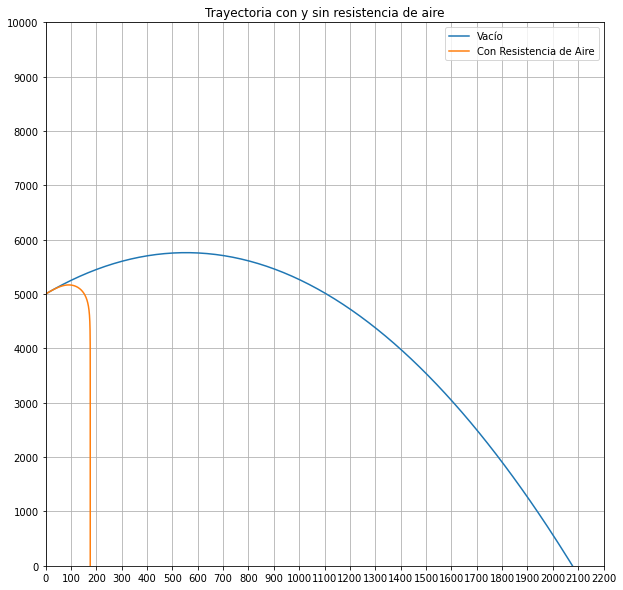

In [29]:
# Hacer una figura con dimensiones de (15 x 4) pixeles.
fig = plt.figure(figsize=(10,10))

# Hacer el gráfico
plt.plot(r_x,r_y, label="Vacío")
plt.plot(x_list,y_list, label="Con Resistencia de Aire")

# Poner una cuadrícula
plt.grid()

# Hacer que los ejes tengan la misma proporción

# Poner el título del gráfico
plt.title("Trayectoria con y sin resistencia de aire")

# Definir el rango del eje x
plt.xlim([0,2200])
# Definir el rango del eje y
plt.ylim([0,10000])

# Definir la ubicación de los ticks (marcadores) del eje x
_ = plt.xticks(np.arange(0,2201,100))
# Definir la ubicación de los ticks (marcadores) del eje y
_ = plt.yticks(np.arange(0,10001,1000))

# Poner una leyenda para identificar a qué simulación corresponde cada línea
_ = plt.legend()

### Comparación gráfica de los distintos componentes de las ecuaciones

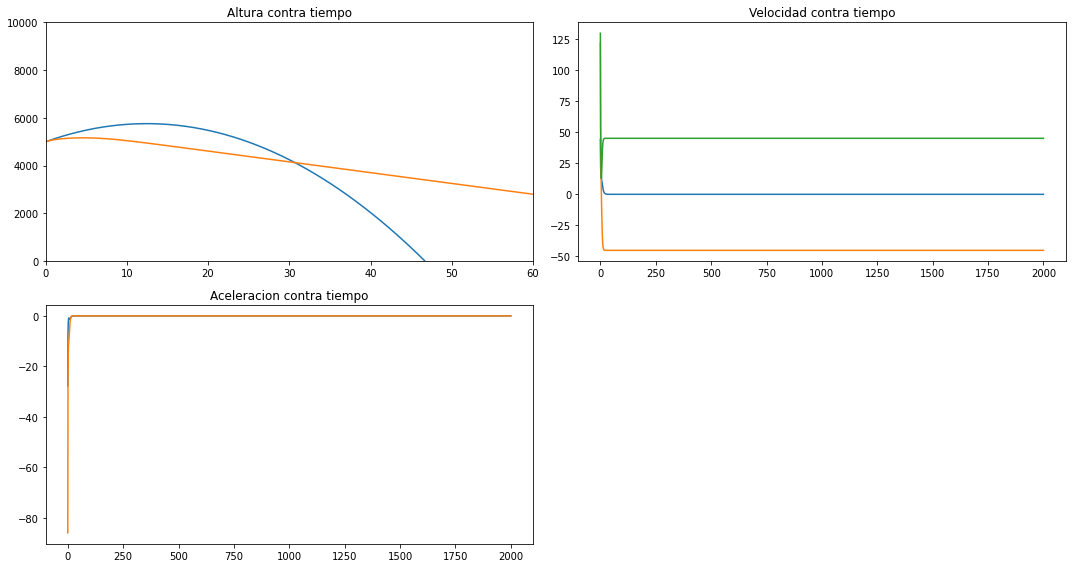

In [30]:
fig = plt.figure(figsize = (15,8))

plt.subplot(2,2,1)

plt.plot(t,r_y,label="Vacio")
plt.plot(t_list,y_list,label="Con Resistencia de Aire")
plt.title("Altura contra tiempo")
plt.xlim([0,60])
_ = plt.ylim([0,10000])

plt.subplot(2,2,2)

plt.plot(t_list,v_x_list,label="v_x")
plt.plot(t_list,v_y_list,label="v_y")
plt.plot(t_list,v_list,label="v")
plt.title("Velocidad contra tiempo")

plt.subplot(2,2,3)

plt.plot(t_list,a_x_list,label="a_x")
plt.plot(t_list,a_y_list,label="a_y")
plt.title("Aceleracion contra tiempo")

plt.tight_layout()

# Funcionamiento de la aplicación
La simulación se realizó utilizando el módulo de streamlit, que es un framework simple para ingresar y visualizar datos. A continuación se definirán los pasos que toma el programa para el desarrollo de la simulación. Nos enfocaremos primero en la página de simulación.

Dentro de la función cargar(), tenemos primero tres sliders que nos permiten fijar las variables de velocidad inicial, ángulo de salida y altitud del volcán. Tenemos estas tres variables primero, ya que el rango que pueden tomar no dependen del tipo de proyectil que se lanza. Además de seleccionar estas variables, se muestra la velocidad inicial descompuesta en sus componentes $x$ y $y$.

In [ ]:
st.header("Simulación de un proyectil")

v_0 = st.slider("Velocidad Inicial", 100, 500 ,400)
theta_deg = st.slider('Angulo: ', min_value=0, max_value=90, step=1, value=45)

vx = v_0*(np.cos(theta_deg))
vy = v_0*(np.sin(theta_deg))

st.text(f"V. inicial x en m/s: {vx}")
st.text(f"V. Inicial y en m/s: {vy}")

y_0 = st.slider('Altitud del volcan: ', min_value=0, max_value=7000, step=500, value=5000)
ticks = 1000

Después tenemos un dropdown en donde podemos elegir el tipo de proyectil que queremos analizar. Esto nos permite posteriormente delimitar los rangos de las variables de radio y densidad que son diferentes entre los diferentes tipos de proyectiles. Después de fijar estas dos variables se puede calcular la masa utilizando el volumen. El coeficiente de arrastre también cambia dependiendo del proyectil que se elija

In [ ]:
proyectil = st.selectbox('Tipo de proyectil: ',['Ceniza','Lapilli', 'Bombas volcánicas'])

if proyectil == 'Ceniza':
    st.text(ceniza)
    r = 0.0005
    m = 0.001
    C = 0.7
    x_max = 20000
    ticks = 2000


elif proyectil == 'Lapilli':
    st.text(lapilli)
    r = st.slider('Radio en metros: ', min_value=0.02, max_value=0.032, step=0.002, value=0.032)
    rho = st.slider("Densidad en kg/m^3:", 2500, 2900, 2700, 50)
    m = rho*volumen(r)
    st.text(f"Masa en kg: {m}, Densidad en kg/m^3: {rho}")
    C = 0.65
    x_max = 20000

elif proyectil == 'Bombas volcánicas':
    st.text(bombas)
    r = st.slider('Radio en metros: ', min_value=0.032, max_value=1.0, step=0.1, value=0.05)
    rho = st.slider("Densidad en kg/m^3:", 2900, 3400, 3100, 50)
    m = rho*volumen(r)
    st.text(f"Masa en kg: {m}, Densidad en kg/m^3: {rho}")
    C = 0.47
    x_max = 20000

t = np.linspace(0,100,num=1000)
rho = 1

A = np.pi*r**2

dt = 0.2
N = 10000
D = 0.5*(rho*C*A)

Ya con las variables determinadas, llamamos a las funciones para calcular las trayectorias que previamente definimos, y agregamos como parámetros estas variables. Con esto tenemos en nuestras manos las listas que contienen las diferentes marcas por cada trayecto que se realizó.

In [ ]:
r_x, r_y = pr.proyectile_no_drag(v_0, theta_deg, y_0, t)
[x_list, y_list, v_list, v_x_list, v_y_list, a_x_list, a_y_list, t_list] = pr.proyectile_with_drag(v_0, theta_deg, y_0, m, D, dt, N, g = 9.81)

    

Con las listas anteriores, podemos llamar a las funciones que determinamos para realizar las visualizaciones del trayecto, pasando como parámetros estas mismas listas. Estas funciones nos regresan un gráfico.

In [ ]:
col1, col2 = st.beta_columns(2)

fig_no_drag = plot.plot_no_drag(r_x, r_y, x_max, ticks)
fig_drag = plot.plot_no_drag(x_list, y_list, x_max, ticks)
fig1 = plot.plot_trayectories(r_x, r_y, x_list, y_list, x_max,ticks)
fig_comp = plot.plot_extra(t, r_y, t_list, y_list, v_x_list, v_y_list, v_list, a_x_list, a_y_list)

Por último utilizando métodos de streamlit mostramos estas gráficas al usuario. Estas gráficas se irán actualizando automáticamente en caso de que se modifique alguna variable.

In [ ]:
with col1:
    st.subheader("Trayectoria en el vacío")
    st.pyplot(fig_no_drag)
with col2:
    st.subheader("Trayectoria con resistencia del aire")
    st.pyplot(fig_drag)


st.subheader("Diferencias en las trayectorias")
st.pyplot(fig1)

st.subheader("Relación con el tiempo")
st.pyplot(fig_comp)


### ¿Cómo navegar por la aplicación?
Para navegar, se utilizó un sidebar en donde se encuentra el menú. Automáticamente se muestra la página de instrucciones y bienvenida a MOVIS. 
Utilizando la función de sidebar ya incluida, en un diccionario se guardó todos los elementos del menú. Por cada página se creó un archivo diferente pero todos con la función de cargar. Así, si se elige una página, solo se cambia de archivo pero corre la función con el mismo nombre cargar().

In [ ]:
import pages.simu as simu
import pages.cono as cono
import pages.refe as ref
import pages.eq as eq
import pages.intruc as ins
import pages.obs as obs
import streamlit as st

st.title('MOVIS')
st.subheader("Modelación Volcánica Interactiva y Simple")

pags = {
    "Bienvenido": ins,
    "Marco teórico": cono,
    "Simulación": simu,
    "Ecuaciones": eq,
    "Observaciones": obs,
    "Referencias": ref
}

st.sidebar.title('Ir a:')

selection = st.sidebar.radio("", list(pags.keys()))

page = pags[selection]
page.cargar()

# Observaciones y análisis
Podemos observar que considerando los valores para las variables más comunes, el trayecto del proyectil se ve fuertemente afectado por la resistencia del aire. Considerando que el cráter se encuentra a una altura de 5000 metros sobre el nivel del mar, un proyectil con las características citadas en la sección de definición de variables llegará a un alcance de casi 2100 m del epicentro en condiciones del vacío. Cuando realmente el alcance máximo con la resistencia del aire será menor a los 200 metros. Esto se debe a que, gracias a la fuerza de resistencia D, horizontalmente la magnitud de la velocidad irá decrementando comforme pase el tiempo, hasta tal punto que la velocidad en x tendrá una magnitud muy cercana a 0, significando que ya no viajará horizontalmente y solo actuará la aceleración gravitacional g desde este punto. 

A pesar de que el alcánce menor del proyectil con resistencia del aire, podemos observar en la gráfica de 'Altura contra tiempo' que el tiempo de vuelo es mayor con la resistencia del aire. Esto se debe a que el proyectil empieza a perder velocidad horizontal hacia abajo por la fuerza de resistencia que contrapone al de gravedad, causando a que esta llegue a un equilibro de fuerzas (fuerza neta vertical equivale a 0) y resultando en una velocidad terminal. Esto significa que comparado con el proyectil en el vacío este tendra una velocidad promedio menor durante el desplazamiento que haga hacia abajo, teniendo así un mayor tiempo de vuelo. Esto sucede ya que en un estado del vacío no se presenta una velocidad terminal por falta de fuerza que contraponga a la gravedad. La velocidad menor del fenómeno con resistencia se puede observar en la gráfica de 'Velocidad contra tiempo', en donde la velocidad en cualquier marca de tiempo del proyectil en el vacío es sustancialmente mayor.

Simulando con los diferentes tipos de proyectiles (resultando en diferencias en las variables) se pudo observar que mientras más masa posea un proyectil su alcance es más cercano al alcance sin resistencia del aire. Esto se estima que sucede por la ecuación de aceleración $a_x(t+\Delta t) = -\frac{D}{m}vv_x$ y $a_y(t+\Delta t)= -g-Dvv_y$, en donde $a_x$ es inversamente proporcional a la masa. Consecuentemente resulta en que la la desaceleración sea menor en la componente $x$ mientras mayor sea la masa.

Matemáticamente, el fenómeno en el vacío asimila a un modelo polinomial de segundo grado fuertemente. Pero el fenómeno con la resistencia no asimila este modelo, de hecho, desvia significadamente con una caída abrupta. Dicho esto, la única similitud que se tienen entre los dos modelos realizados es el punto inicial en t=0.


# Conclusión
Regresando a la hipótesis, podemos confirmar que el proyectil en el vacío tiene un alcance y altura máxima mayor que el fenómeno con resistencia del aire. Sin embargo, la hipótesis de gráficas similares no se cumple ya que el análisis con resistencia del aire presenta un punto en donde el desplazamiento horizontal se vuelve minimo, presentándose como una caída vertical. Este refutación se debe a que en la hipótesis se subestimó la fuerza de resistencia del aire, que realmente es un factor muy influyente y que gracias a esta el alcance de los proyectiles es mucho menor a un modelo sin este factor. 

Con este trabajo de investigación, se pudo visualizar y modelar correctamente el impacto e influencia que tiene el aire sobre los tiros parabolicos, y cómo en situaciones catastrofícas como las explosiones volcánicas la resistencia del aire reducen en gran magnitud el área de los daños que los proyectiles balísticos llegasen a causar. 

En un futuro, ya con mayor conocimiento el la programación, se podría mejorar la aplicación haciendo una pestaña en donde se puedan comparar diferentes proyectiles y su trayectoria. También se podría agregar una función para escalar las gráficas conforme a los valores que se muestran,ya que por el momento solo se puede tener escalas fijas aunque cambien las variables.

Por último, estaría increible poder desarrollarlo de manera simple, y hacer que las personas puedan acceder a este programa sin tener que recurrir al complicado proceso de tener que entrar comandos en la terminal para ejecutar el programa. Así, se puede aportar y empujar una mejor educación sobre los riesgos y procesos físicos y computacionales que conlleva el análisis de una trayectoria de proyectil.

# Referencias
Abimelec, I., Alatorre, M. A., Delgado, H. (s.f.). Mapa de Peligros por Caída de Productos Balísticos del Volcán Popocatépetl \[PDF\]. UNAM. Recuperado de http://sgpwe.izt.uam.mx/pages/cbi/ruth/MecanicaElementalI/practicas/balisticos.pdf 

CENAPRED (s.f.). Balísticos \[PDF\]. Recuperado de http://www.cenapred.gob.mx/es/Publicaciones/archivos/270-INFOGRAFAPOPOCATPETL-CADADEBALSTICOS.PDF

González, E. (s.f.). Lapilli. Recuperado de http://previa.uclm.es/profesorado/egcardenas/lapilli.htm

Servicio Geológico Mexicano. (2017, Marzo 22). Depósitos piroclásticos y rocas piroclásticas. Recuperado de https://www.sgm.gob.mx/Web/MuseoVirtual/Riesgos-geologicos/Depositos-piroclasticos-y-rocas.html

Volcanes: La velocidad impávida de los flujos piroclásticos se debe a 'colchones de aire'. (s.f.). Recuperado de https://nmas1.org/news/2019/04/09/volcan-geologia


